<a href="https://colab.research.google.com/github/PranavShashidhara/Movie-Recommendation-system/blob/main/Matrix_Factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.utils import shuffle
from datetime import datetime
import json
import pickle
import matplotlib.pyplot as plt

In [7]:
with open('user2movie_10M.json', "rb") as f:
  user2movie = pickle.load(f)
with open('movie2user_10M.json', "rb") as f:
  movie2user = pickle.load(f)
with open('usermovie2rating_10M.json', "rb") as f:
  usermovie2rating = pickle.load(f)
with open('usermovie2rating_test_10M.json', "rb") as f:
  usermovie2rating_test = pickle.load(f)

N = np.max(list(user2movie.keys())) + 1 # number of users
m1 = np.max(list(movie2user.keys())) # number of movies
m2 = np.max([m for (u, m), r in usermovie2rating_test.items()])
M = max(m1, m2) + 1
K = 10
print("N:", N, "M:", M)

W = np.random.randn(N, K)
b = np.zeros(N)
c = np.zeros(M)
U = np.random.randn(M, K)
print(type(usermovie2rating.values()))
mu = np.mean(list(map(float, usermovie2rating.values())))

epochs = 10
reg = 0.001 # Regularization penalty
train_losses = []
test_losses = []
val_losses = []

def get_loss(d): # custom loss function required as the different bias variables needs to be taken into account for mse calculations.
  # d: (user_id, movie_id) -> rating
  N = float(len(d))
  sse = 0
  for k, r in d.items():
    i, j = k
    p = W[i].dot(W[j]) + b[i] + c[j] + mu # squared error formula
    r = float(r)
    sse += (r-p) ** 2
    return sse / N

N: 10000 M: 2000
<class 'dict_values'>


In [8]:
for epoch in range(epochs): # Looping through multiple epochs
  print("epoch:", epoch)
  # for updating W and b
  for i in range(N): #looping through each user
    matrix = np.eye(K) * reg
    vector = np.zeros(K)
    bi = 0

    for j in user2movie[i]: # looping through each movie
      r = usermovie2rating[(i, j)]
      r = float(r)
      matrix += np.outer(U[j], U[j])
      vector += (r - b[i] - c[j] - mu) * U[j]
      bi = r - W[i].dot(U[j]) - c[j] - mu
    W[i] = np.linalg.solve(matrix, vector)
    b[i] = bi/(len(user2movie[i]) + reg)

    if i % (N//10) == 0:
      print("i:", i, "N:", N)

  # for updating U and c
  for j in range(M):
    matrix = np.eye(K) * reg
    vector = np.zeros(K)

    cj = 0
    try: # Since it is possible to have no user ratings for a given movie in the train set which might be in the test set.
      for i in movie2user[j]:
        r = usermovie2rating[(i,j)]
        r = float(r)
        matrix += np.outer(W[i], W[i])
        vector += (r - b[i] - c[j] - mu)*W[i]
        cj += (r - W[i].dot(U[j]) - b[i] - mu)

      # set the updates
      U[j] = np.linalg.solve(matrix, vector)
      c[j] = cj / (len(movie2user[j]) + reg)
    except:
      pass
  train_losses.append(get_loss(usermovie2rating))
  test_losses.append(get_loss(usermovie2rating_test))
  print("train_loss:", train_losses[-1])
  print("test_loss:", test_losses[-1])

print("train_losses", train_losses[-1])
print("test_losses:", test_losses[-1])


epoch: 0
i: 0 N: 10000
i: 1000 N: 10000
i: 2000 N: 10000
i: 3000 N: 10000
i: 4000 N: 10000
i: 5000 N: 10000
i: 6000 N: 10000
i: 7000 N: 10000
i: 8000 N: 10000
i: 9000 N: 10000
train_loss: 4.130190040255662e-07
test_loss: 1.4922994702619355e-07
epoch: 1
i: 0 N: 10000
i: 1000 N: 10000
i: 2000 N: 10000
i: 3000 N: 10000
i: 4000 N: 10000
i: 5000 N: 10000
i: 6000 N: 10000
i: 7000 N: 10000
i: 8000 N: 10000
i: 9000 N: 10000
train_loss: 3.9935066857986195e-07
test_loss: 1.6272739697708899e-07
epoch: 2
i: 0 N: 10000
i: 1000 N: 10000
i: 2000 N: 10000
i: 3000 N: 10000
i: 4000 N: 10000
i: 5000 N: 10000
i: 6000 N: 10000
i: 7000 N: 10000
i: 8000 N: 10000
i: 9000 N: 10000
train_loss: 4.1734826836680585e-07
test_loss: 1.659312308514248e-07
epoch: 3
i: 0 N: 10000
i: 1000 N: 10000
i: 2000 N: 10000
i: 3000 N: 10000
i: 4000 N: 10000
i: 5000 N: 10000
i: 6000 N: 10000
i: 7000 N: 10000
i: 8000 N: 10000
i: 9000 N: 10000
train_loss: 4.1604987916933396e-07
test_loss: 1.5963505207225534e-07
epoch: 4
i: 0 N: 10000

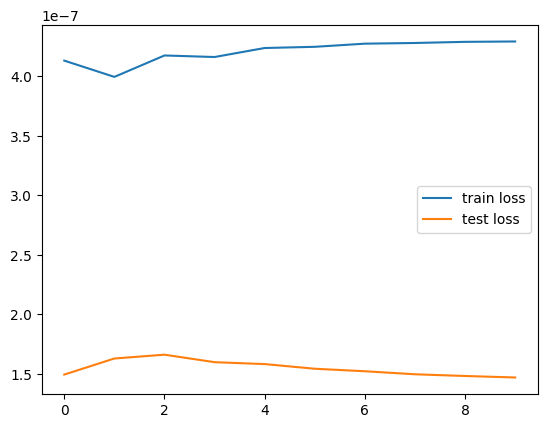

In [9]:
plt.plot(train_losses, label = "train loss")
plt.plot(test_losses, label = "test loss")
plt.legend()
plt.show()